## Машинное обучение, ВШЭ

## Практическое задание 2

### Общая информация
Дата выдачи: 03.10.2019

Мягкий дедлайн: 23:59 MSK 13.10.2019

Жесткий дедлайн: 23:59 MSK 20.10.2019

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) получат 0 за всю работу. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

In [1]:
import pandas as pd

#### Загрузите данные по ссылке:

In [ ]:
# df=pd.read_csv()
# https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/homeworks-practice/data/homework-practice-03-data.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2018-fall/homeworks-practice/data/homework-practice-03-data.csv")
df.head()

,f0,f1,f2,f3,f4,f5,f6
0,16.99,1.01,0.976270,-3.697815,0.623295,0.524760,7199.992000
1,10.34,1.66,4.303787,7.715073,0.886961,0.473862,2466.136700
2,21.01,3.50,2.055268,-6.464284,0.618826,1.657394,2969.369100
3,23.68,3.31,0.897664,1.335254,0.133461,1.234554,1040.665300
4,24.59,3.61,-1.526904,-0.196414,0.980580,3.086397,37.469975


In [3]:
import numpy as np
from sklearn import preprocessing
X = np.hstack((df.iloc[:, :1].values, df.iloc[:, 2:].values ))
y = df.iloc[:, 1].values


min_max_scaler = preprocessing.MinMaxScaler()
X_1 = min_max_scaler.fit_transform(X)
X_1

array([[0.29157939, 0.54731902, 0.40047788, 0.6232234 , 0.06123653,
        0.02631221],
       [0.1522832 , 0.71467363, 0.85011312, 0.88744583, 0.05529074,
        0.00899738],
       [0.3757855 , 0.60158628, 0.29148688, 0.61874548, 0.19354611,
        0.01083804],
       ...,
       [0.41055718, 0.1135002 , 0.59932855, 0.48302714, 0.15182911,
        0.00923858],
       [0.30896523, 0.5156997 , 0.45419933, 0.03869091, 0.00280662,
        0.00956172],
       [0.32907415, 0.12812196, 0.26705095, 0.63966848, 0.06562437,
        0.0011871 ]])

## Линейная регрессия из коробки

По [ссылке1](https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial) и [ссылке2](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/) доступен стандартный пример применения sklearn для решения задачи регрессии. Рекомендуем прочитать один из этих примеров, если вы раньше не работали с библиотекой sklearn.

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2. Используйте функцию train_test_split из sklearn.

In [16]:
# your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=11)

#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1.  В качестве фичей используйте все остальные признаки и константу. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$ (r2_score в sklearn):
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [17]:
# your code here
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
LR.fit(X_train, y_train)
print("R2 =", LR.score(X_test, y_test))
print("Веса:",LR.coef_)

R2 = 0.577160936528744
Веса: [4.90972596 0.16457405 0.04576368 0.13962469 1.3927558  0.57588728]


In [25]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01)
clf.fit(X_train, y_train)
print("R2 =", clf.score(X_test, y_test))
print("Веса:",clf.coef_)

R2 = 0.6042996802889398
Веса: [4.66899596 0.03102071 0.         0.02186378 0.72883587 0.        ]


#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [7]:
# your code here
print("Веса без регуляразации:",LR.coef_)
print("Веса с регуляразацией Лассо:",clf.coef_)

Веса без регуляразации: [1.02843024e-01 8.27711066e-03 1.80295837e-03 1.39919269e-01
 1.62695920e-01 2.10639909e-06]
Веса с регуляразацией Лассо: [1.01420563e-01 8.59175281e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.17130873e-06]


Видим, что 2 веса с регуляразией имеют нулевые значения, скорее всего они никак не влияют на таргет или являются линейной комбинацией других признаков. Таким образом мы избавились от мультиколинеарности и повысили показатель R2

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной? Используйте метод seaborn.pairplot.

Тут надо смотреть на вторую строку матрицы. Чётко видно, что на таргет очевидную свзяь оказывает только 1 признак. Если мы увеличим штраф регуляразации он занулит еще несколько весов, так как они имеют практически случайный характер

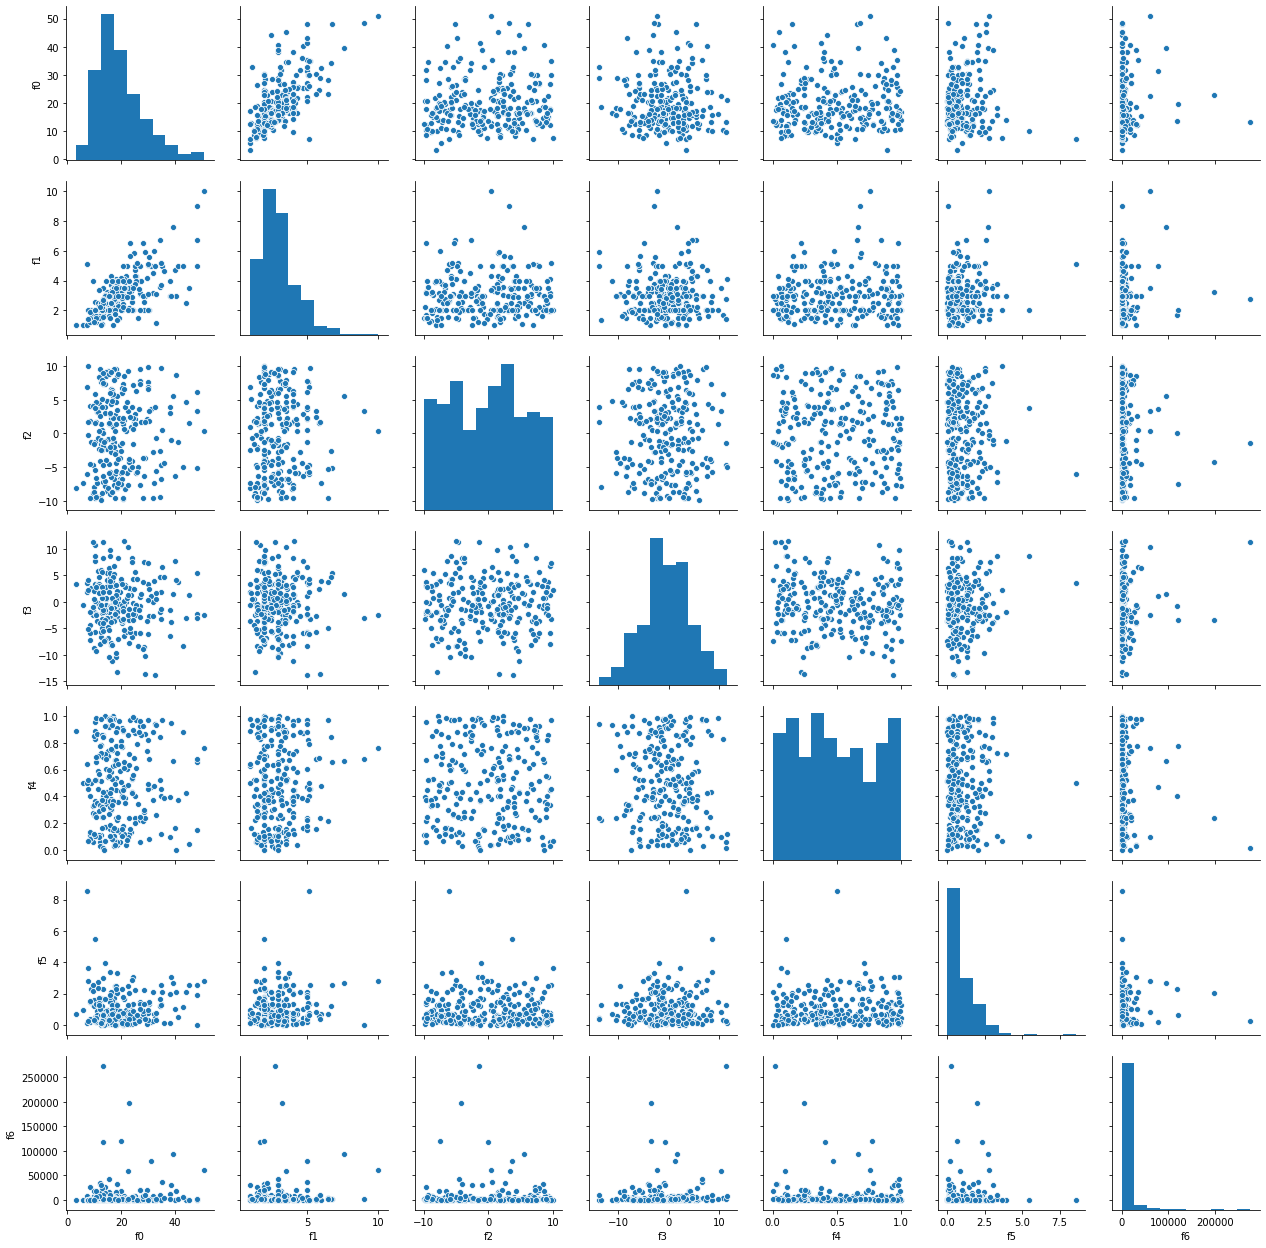

In [26]:
# your code here
import seaborn as sns
col = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']
sns.pairplot(df[col])

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо написать реализацию стохастического градиентного спуска.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

Обучать свободный коэффициент не нужно! Можно считать, что если он нам нужен, то в выборку добавлен константный признак.

In [498]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
import numpy as np
import random
 
class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, tolerance=1e-4, max_iter=1000, w0=None, eta=0.001):
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = None
   
    def fit(self, X, y):
        self.loss_history = []
        cur_w = self.w0
        if cur_w == None:
            cur_w = np.zeros(X.shape[1], dtype=np.float)
        self.w = cur_w.copy()
        iteration = 0
        cur_loss = self.calc_loss(X, y)
        cur_euclid_norm = 1
        self.loss_history.append(cur_loss)
        while iteration < self.max_iter and cur_euclid_norm > self.tolerance:
            batch_size = 1
            np.random.seed(228)
            ind = np.random.randint(low=0, high=X.shape[0], size=batch_size)
            X_batch, y_batch = X[ind, :].reshape(batch_size, -1), y[ind]
            cur_grad = self.calc_gradient(X_batch, y_batch)
            cur_w -= self.eta * cur_grad
            cur_euclid_norm = cdist(cur_w.reshape(1, -1), self.w.reshape(1, -1))[0][0]
            cur_loss = self.calc_loss(X, y)
            self.w = cur_w.copy()
            self.loss_history.append(cur_loss)
            iteration += 1
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        return X.dot(self.w)
   
    def calc_gradient(self, X, y):
        y_del = (X.dot(self.w) - y).reshape((-1, 1))
        compare_with_delta = np.absolute(y_del) <= self.delta
        grad = np.zeros(X.shape[1], dtype=np.float)
        more_delta_ind = np.where(compare_with_delta == True)
        less_delta_ind = np.where(compare_with_delta == False)
        gradient = 0
        if more_delta_ind[0].shape[0] != 0:
            gradient = (y_del[more_delta_ind].reshape((-1, 1)) * X[more_delta_ind[0], :]).sum(axis=0)
        if less_delta_ind[0].shape[0] != 0:
            gradient += (np.sign(y_del[less_delta_ind].reshape((-1, 1))) * X[less_delta_ind[0], :] * self.delta).sum(axis=0)
        return gradient / X.shape[0]
       
 
    def calc_loss(self, X, y):
        y_abs = np.abs(y - X.dot(self.w))
        compare_with_delta = y_abs <= self.delta
        more_delta_ind = np.where(compare_with_delta == True)
        less_delta_ind = np.where(compare_with_delta == False)
        loss_sum = (y_abs[more_delta_ind]**2 / 2).sum()
        loss_sum += ((y_abs[less_delta_ind] - self.delta / 2) * self.delta).sum()
        return loss_sum / y.shape[0]

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных (добавив константный признак), сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [499]:
import matplotlib.pyplot as plt

БЕЗ КОНСТАТНОГО ПРИЗНАКА. Очень странно сходится, стоит отметить, что без нормализации вообще не сходится 


[1.19349593 2.34181141 0.74718099 0.14701075 0.10632745 0.00610163]


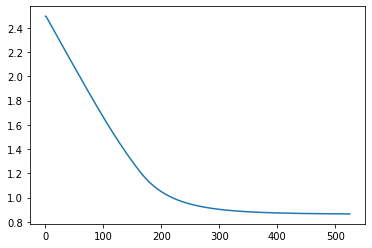

In [500]:
# your code here
HG = HuberReg(delta=1.0, tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2)
hg = HG.fit(X_train,y_train)
print(hg.w)
plt.plot(hg.loss_history)

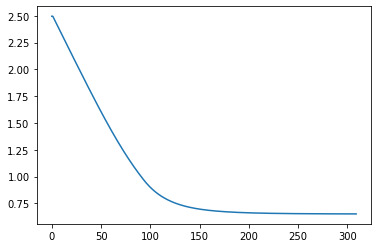

In [501]:
ones = np.ones((X_train.shape[0], 1))
X_2 = np.hstack((ones,X_train))
hg2 = HG.fit(X_2, y_train)
plt.plot(hg2.loss_history)

In [502]:
ones_1 = np.ones((X_test.shape[0], 1))
X_3 = np.hstack((ones_1,X_test))
ones4 = np.ones((X_train.shape[0], 1))
X_4 = np.hstack((ones4,X_train))
hgw = HG.fit(X_4, y_train)
hg3 = HG.predict(X_3)
hgw.w

array([1.35802104, 0.67673483, 1.32785148, 0.42366579, 0.08335789,
       0.06028968, 0.00345974])

R квадрат либо стремится к нулю, либо вообще отрициательный. Хотя модель вроде как обучается. Я думаю это связано с тем, что наш градиент достаточно быстро сходится. Скорее всего это связано с тем, что у нас есть признаки, которые почти никак не влияют на таргет и поэтому стохастичсекий ГД сходится быстро и даёт плохое прдсказание в отличие от полного ГД

In [503]:
r2_score(y_test, hg3)

-0.13881082751710871

Тут видно, что на ошибку ничего не влияет почти

(-0.5425489180537626, 0.01)
(-0.5425489180537626, 0.11)
(-0.5425489180537626, 0.21000000000000002)
(-0.5425489180537626, 0.31000000000000005)
(-0.5425489180537626, 0.41000000000000003)
(-0.5425489180537626, 0.51)
(-0.5425489180537626, 0.6100000000000001)
(-0.5425489180537626, 0.7100000000000001)
(-0.5425489180537626, 0.81)
(-0.5425489180537626, 0.91)
(-0.5425489180537626, 1.01)
(-0.5425489180537626, 1.11)
(-0.5425489180537626, 1.2100000000000002)
(-0.5425489180537626, 1.31)
(-0.5425489180537626, 1.4100000000000001)
(-0.5425489180537626, 1.51)
(-0.5425489180537626, 1.61)
(-0.5425489180537626, 1.7100000000000002)
(-0.5425489180537626, 1.81)
(-0.5425489180537626, 1.9100000000000001)
(-0.5425489180537626, 2.01)
(-0.5425489180537626, 2.11)
(-0.5425489180537626, 2.21)
(-0.5425489180537626, 2.31)
(-0.5425489180537626, 2.41)
(-0.5425489180537626, 2.51)
(-0.5425489180537626, 2.61)
(-0.5425489180537626, 2.71)
(-0.5425489180537626, 2.81)
(-0.5425489180537626, 2.91)
МАКСИМУМ:  -0.5425489180537626


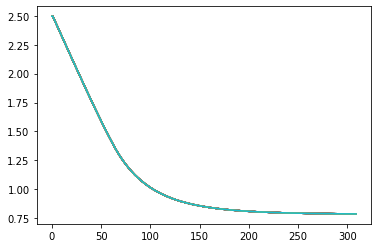

In [481]:
c = []
for eta1 in np.arange(0.01, 2.91, 0.1):
    HG1 = HuberReg(delta=1.0, tolerance=1e-4, max_iter=1000, w0=None, eta=eta1)
    hg4 = HG.fit(X_2, y_train)
    hg5 = HG.predict(X_3)
    tup = (r2_score(y_test, hg5), eta1)
    print(tup)
    c.append(r2_score(y_test, hg5))
    plt.plot(hg4.loss_history)
print("МАКСИМУМ: ",max(c))

-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871
-0.13881082751710871


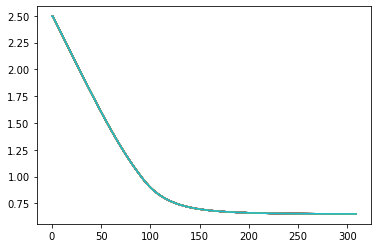

In [411]:
for eta1 in np.arange(0.01, 2.91, 0.1):
    HG1 = HuberReg(delta=1.0, tolerance=eta1, max_iter=1000, w0=None, eta=0.1)
    hg4 = HG.fit(X_2, y_train)
    hg5 = HG.predict(X_3)
    print(r2_score(y_test, hg5))
    plt.plot(hg4.loss_history)

In [412]:
X_train_new = X_train[:,:1]
X_test_new = X_test[:, :1]

In [413]:
ones2 = np.ones((X_train_new.shape[0], 1))
X_train_new = np.hstack((ones,X_train_new))
HG.fit(X_train_new, y_train)
ones_3 = np.ones((X_test_new.shape[0], 1))
X_test_new = np.hstack((ones_3,X_test_new))
hg6 = HG.predict(X_test_new)
r2_score(y_test, hg6)

0.2633851352025032

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Как делать красивые графики, можно посмотреть здесь: https://robjhyndman.com/hyndsight/graphics/

In [407]:
# your code here

Text(0.5, 1.0, 'Зависимость ошибки от количесвто итераций')

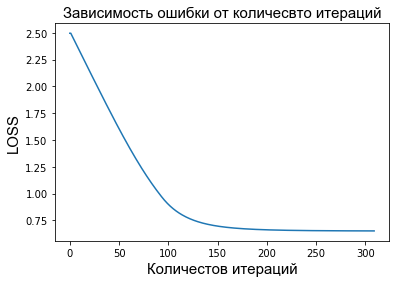

In [523]:
plt.plot(hg2.loss_history)

plt.xlabel('Количестов итераций', fontsize=15., fontname='Arial')
plt.ylabel('LOSS', fontsize=15., fontname='Arial')
plt.title("Зависимость ошибки от количесвто итераций", fontsize=15, fontname='Arial')